In [ ]:
#Yuval Mehta C057
#Div-B Sem-X
#Exp2 MLOA

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:

if int(input('1.VS or 2.GC?'))==1:
    df=pd.read_csv('train.csv')
else:
    df=pd.read_csv('/content/train.csv')


In [3]:
df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
sum(df.isna().sum()>=1)

0

In [ ]:
y=df.label
X=df.iloc[:,1:]

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)

In [6]:
def train_model(model,params={}):
  grid=GridSearchCV(model,param_grid=params,n_jobs=-1,refit=True,cv=3,verbose=1)
  grid.fit(x_train,y_train)
  print(grid.best_score_)
  return grid

def report(model):
  print(model.best_params_)
  preds=model.predict(x_test)
  print(metrics.accuracy_score(y_test,preds))
  cm=metrics.confusion_matrix(y_test,preds)
  print(cm)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
  cm_display.plot()
  plt.show()
  print(metrics.classification_report(y_test,preds))


In [18]:
##manualPCA():
X_mean = X.mean()

X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std


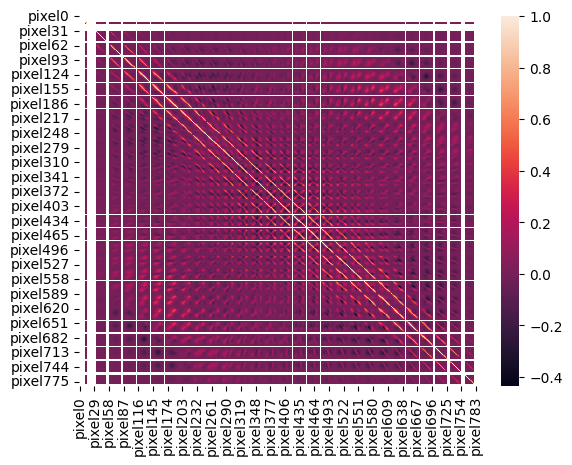

In [19]:

# covariance
c = Z.cov()
sns.heatmap(c)
plt.show()


In [25]:
c2=c.fillna(0)

In [26]:

eigenvalues, eigenvectors = np.linalg.eig(c2)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)


Eigen values:
 [ 4.06955098e+01  2.91107725e+01  2.67826994e+01  2.08142238e+01
  1.80995896e+01  1.57872978e+01  1.38240715e+01  1.25429656e+01
  1.10636340e+01  1.00886865e+01  9.63594259e+00  8.65558861e+00
  8.04101326e+00  7.88067927e+00  7.43619854e+00  7.16726634e+00
  6.73522339e+00  6.61636220e+00  6.42339284e+00  6.26811750e+00
  5.93946237e+00  5.74915143e+00  5.48813812e+00  5.32636794e+00
  5.15204771e+00  4.94719219e+00  4.88841932e+00  4.70765936e+00
  4.46517927e+00  4.36341313e+00  4.32532851e+00  4.22702259e+00
  4.08716782e+00  4.06167097e+00  3.99893913e+00  3.86795787e+00
  3.81916746e+00  3.71247668e+00  3.57429027e+00  3.45879390e+00
  3.41428712e+00  3.36937835e+00  3.25685428e+00  3.24001109e+00
  3.18305370e+00  3.16279109e+00  3.14236559e+00  3.09280451e+00
  3.06360759e+00  3.02335072e+00  2.96842669e+00  2.91823745e+00
  2.84942112e+00  2.82799295e+00  2.79583010e+00  2.76689943e+00
  2.68968233e+00  2.63697262e+00  2.60836404e+00  2.58931855e+00
  2.501209

In [27]:

# Index the eigenvalues in descending order 
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]


In [29]:

explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
print(explained_var)


[0.05747953 0.09859644 0.13642512 0.16582374 0.19138813 0.21368657
 0.2332121  0.25092815 0.26655475 0.28080431 0.2944144  0.3066398
 0.31799717 0.32912807 0.33963118 0.34975443 0.35926746 0.36861261
 0.37768519 0.38653847 0.39492754 0.40304781 0.41079942 0.41832254
 0.42559944 0.432587   0.43949155 0.44614078 0.45244753 0.45861055
 0.46471977 0.47069014 0.47646297 0.4821998  0.48784802 0.49331123
 0.49870554 0.50394915 0.50899758 0.51388288 0.51870532 0.52346433
 0.52806441 0.53264069 0.53713653 0.54160375 0.54604212 0.55041049
 0.55473762 0.55900789 0.56320058 0.56732239 0.57134699 0.57534133
 0.57929025 0.5831983  0.58699728 0.59072182 0.59440595 0.59806318
 0.60159596 0.60510684 0.60856097 0.61197491 0.61535276 0.61871752
 0.62203462 0.62533187 0.62853203 0.63169979 0.63482674 0.63794535
 0.64102748 0.64406024 0.64707533 0.65004673 0.65299522 0.6559315
 0.65880998 0.66167904 0.66451075 0.6673396  0.67015662 0.67294877
 0.67571719 0.67848034 0.68121958 0.68393768 0.68661909 0.689273

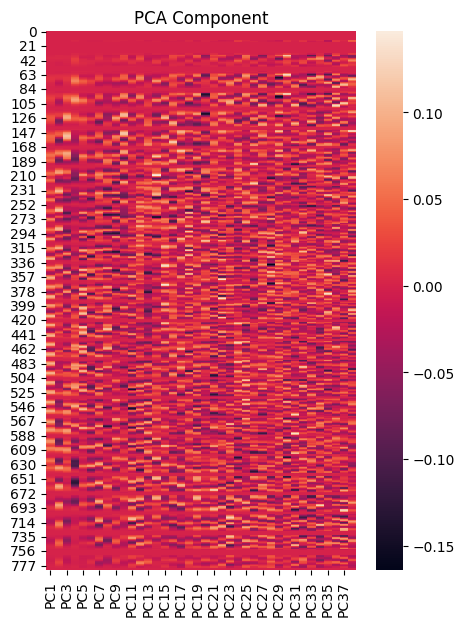

In [34]:
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                            columns=['PC{}'.format(i+1) for i in range(n_components)]
                            )

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

In [44]:

# Importing PCA
from sklearn.decomposition import PCA
 
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
# n_components=40
Z = (X - X_mean) / X_std
pca = PCA(n_components=n_components)
pca.fit(X)
x_pca = pca.transform(X)
 
# Create the dataframe
pcaDf = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])

               PC1         PC2         PC3         PC4          PC5  \
0      -661.595780 -699.311328  183.282040  120.611394   -81.081811   
1      1701.451685 -360.551556 -501.805594  335.423656  -442.378933   
2      -886.894434 -293.765782   67.155310   78.263763  -473.715921   
3      -165.755602  300.182761  -64.145485  759.706261  -425.844379   
4      1923.709716 -449.153069 -548.613023  188.555147  -651.736273   
...            ...         ...         ...         ...          ...   
41995   760.355279 -249.854220 -406.991832 -322.864160 -1005.138838   
41996 -1059.873183 -302.292351    2.941098   38.667116  -360.053230   
41997   336.269982  950.015280 -168.605414 -692.680963  -539.363843   
41998   327.399392   62.016089  697.536401  482.810439  -154.813778   
41999  -364.249200  418.893026   62.899823   77.580323    54.866087   

              PC6         PC7         PC8         PC9        PC10  ...  \
0      489.461886 -683.470837   85.559388  348.548055  202.978579  ...   

In [46]:
pcaDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38
0,-661.595780,-699.311328,183.282040,120.611394,-81.081811,489.461886,-683.470837,85.559388,348.548055,202.978579,...,59.858595,84.513710,7.325962,-4.265444,194.577882,-52.301612,-7.425672,-145.424371,-48.927190,-80.172679
1,1701.451685,-360.551556,-501.805594,335.423656,-442.378933,738.404049,653.875438,-176.600680,-7.520175,67.846282,...,-80.480052,-87.618778,-27.642622,189.320133,115.783169,58.504619,-11.685327,-91.337472,-111.327826,-39.329854
2,-886.894434,-293.765782,67.155310,78.263763,-473.715921,-323.540638,437.799098,-305.377738,-195.295502,-25.626013,...,-10.398115,121.334885,88.202565,40.636020,-48.613117,-118.565991,-15.091988,-2.594232,-52.199571,70.375327
3,-165.755602,300.182761,-64.145485,759.706261,-425.844379,157.390337,-304.099139,276.408985,-45.867215,-295.477623,...,214.547012,191.348529,-103.086964,-31.516949,118.180570,14.828572,119.032232,111.165654,-68.564164,64.787184
4,1923.709716,-449.153069,-548.613023,188.555147,-651.736273,990.063824,564.507042,-255.915215,124.914693,177.566841,...,-69.401573,24.644412,-35.999403,-6.002083,13.236448,-29.168326,-133.348606,69.650127,-78.268405,39.648186


In [45]:
pca.components_

array([[-1.45785228e-17,  1.24524097e-18, -1.71952204e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-8.33982425e-17,  9.76470004e-18, -2.94624441e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.61300353e-18,  2.69648909e-18,  3.08214878e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [-4.57117592e-17,  6.27124966e-18, -2.49021238e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.15640524e-17,  1.08222213e-17, -2.00874762e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-4.34482539e-17, -4.33275335e-17,  6.42864888e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [47]:
x_train,x_test,y_train,y_test=train_test_split(pcaDf,y,test_size=0.10,random_state=0)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
0.9702645502645502
{'n_neighbors': 5}
0.9716666666666667
[[419   0   0   0   1   1   1   0   0   0]
 [  0 467   3   0   0   0   1   1   1   0]
 [  5   1 396   0   0   0   0   4   3   0]
 [  0   0   4 411   0   2   0   4   5   0]
 [  1   2   0   0 409   1   3   1   0  12]
 [  0   0   0   0   0 375   7   0   0   0]
 [  0   0   0   0   1   1 410   0   0   0]
 [  0   4   2   1   2   0   0 456   0   4]
 [  0   2   0   7   2   5   5   0 363   0]
 [  2   1   1   1   5   0   2   6   1 375]]


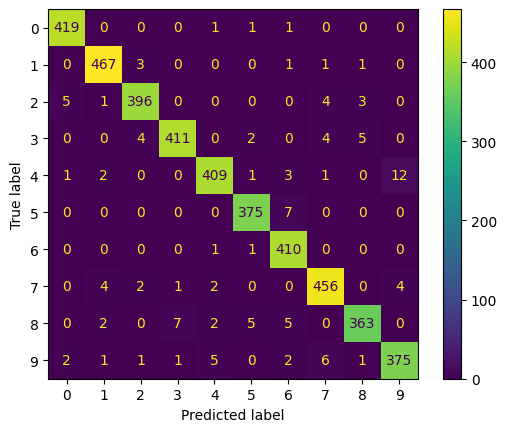

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       422
           1       0.98      0.99      0.98       473
           2       0.98      0.97      0.97       409
           3       0.98      0.96      0.97       426
           4       0.97      0.95      0.96       429
           5       0.97      0.98      0.98       382
           6       0.96      1.00      0.98       412
           7       0.97      0.97      0.97       469
           8       0.97      0.95      0.96       384
           9       0.96      0.95      0.96       394

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200



In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=train_model(KNeighborsClassifier(),{'n_neighbors':[3,5,7,10]})
report(knn)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


c:\Users\Yuval\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\Yuval\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Yuval\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


0.9008465608465608
{'solver': 'newton-cg'}
0.9019047619047619
[[401   0   1   3   1   4   6   2   4   0]
 [  0 463   4   1   1   1   0   0   2   1]
 [  5   5 360   4   4   4  10   4  11   2]
 [  1   1  13 368   1  18   4   5  11   4]
 [  2   2   3   0 388   0   6   1   1  26]
 [  2   2   4  20   3 320   9   4  10   8]
 [  2   0   5   0   7   6 389   0   3   0]
 [  2   3   7   1   5   2   0 425   2  22]
 [  0   4   3  14   1  18   4   1 335   4]
 [  5   2   2   3  16   4   1  17   5 339]]


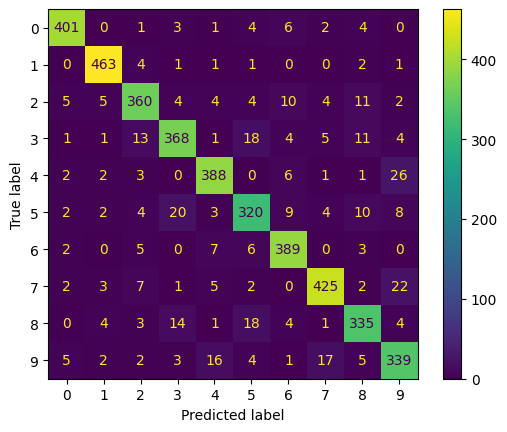

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       422
           1       0.96      0.98      0.97       473
           2       0.90      0.88      0.89       409
           3       0.89      0.86      0.88       426
           4       0.91      0.90      0.91       429
           5       0.85      0.84      0.84       382
           6       0.91      0.94      0.93       412
           7       0.93      0.91      0.92       469
           8       0.87      0.87      0.87       384
           9       0.83      0.86      0.85       394

    accuracy                           0.90      4200
   macro avg       0.90      0.90      0.90      4200
weighted avg       0.90      0.90      0.90      4200



In [49]:
from sklearn.linear_model import LogisticRegression

LR=train_model(LogisticRegression(penalty='l2',multi_class='multinomial',),{'solver':['newton-cg','saga','sag']})
report(LR)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
0.9770899470899471
{'C': 1, 'kernel': 'rbf'}
0.9759523809523809
[[418   0   0   1   1   0   1   0   1   0]
 [  0 467   3   1   0   0   0   1   1   0]
 [  2   1 401   1   0   0   0   1   3   0]
 [  0   0   3 409   0   5   1   2   6   0]
 [  1   0   1   0 415   0   3   1   1   7]
 [  0   0   0   2   0 377   2   0   1   0]
 [  0   0   0   0   1   0 410   0   1   0]
 [  0   1   4   1   3   0   0 455   0   5]
 [  0   2   1   3   2   2   4   0 370   0]
 [  1   1   0   2   6   1   1   4   1 377]]


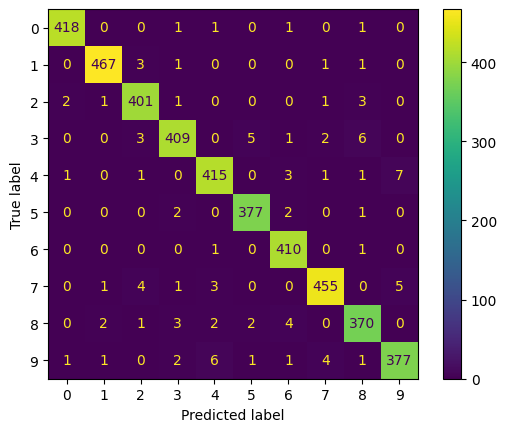

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       422
           1       0.99      0.99      0.99       473
           2       0.97      0.98      0.98       409
           3       0.97      0.96      0.97       426
           4       0.97      0.97      0.97       429
           5       0.98      0.99      0.98       382
           6       0.97      1.00      0.98       412
           7       0.98      0.97      0.98       469
           8       0.96      0.96      0.96       384
           9       0.97      0.96      0.96       394

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200



In [50]:
from sklearn.svm import SVC

SC= train_model(SVC(),params={'kernel':['rbf'],'C':[1,0.5]})
report(SC)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
0.8233597883597884
{'max_depth': 15}
0.8511904761904762
[[385   0   5   3   3   5   8   2   4   7]
 [  0 455   3   4   3   1   3   1   3   0]
 [  5   2 345   9   5   5  10   6  18   4]
 [  7   2   6 356   1  16   3  10  22   3]
 [  3   3   3   4 348   7   9   6   7  39]
 [  5   2   4  25   3 287  11   3  27  15]
 [ 11   1   7   4   6   6 368   3   4   2]
 [  1   5   8   6  12   4   1 404   9  19]
 [  7   3   9  18   4  16   3   3 316   5]
 [  6   2   6  11  24   6   3  14  11 311]]


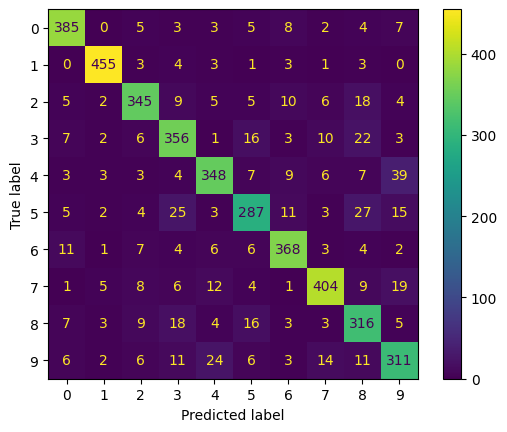

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       422
           1       0.96      0.96      0.96       473
           2       0.87      0.84      0.86       409
           3       0.81      0.84      0.82       426
           4       0.85      0.81      0.83       429
           5       0.81      0.75      0.78       382
           6       0.88      0.89      0.89       412
           7       0.89      0.86      0.88       469
           8       0.75      0.82      0.79       384
           9       0.77      0.79      0.78       394

    accuracy                           0.85      4200
   macro avg       0.85      0.85      0.85      4200
weighted avg       0.85      0.85      0.85      4200



In [51]:
from sklearn.tree import DecisionTreeClassifier

DT=train_model(DecisionTreeClassifier(),params={'max_depth':list(range(5,30)) })
report(DT)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
0.9593386243386243
{'learning_rate': 'constant'}
0.9583333333333334
[[412   0   0   1   1   2   2   0   3   1]
 [  0 463   3   1   2   0   1   1   2   0]
 [  1   2 394   3   0   0   2   3   4   0]
 [  0   0   2 409   0   9   1   2   2   1]
 [  1   3   2   0 408   0   4   1   0  10]
 [  0   0   1   1   0 374   4   0   2   0]
 [  0   0   0   0   1   4 404   0   2   1]
 [  0   2  15   6   1   2   0 436   0   7]
 [  1   4   3   8   4   4   3   2 352   3]
 [  2   0   1   5   5   3   0   5   0 373]]


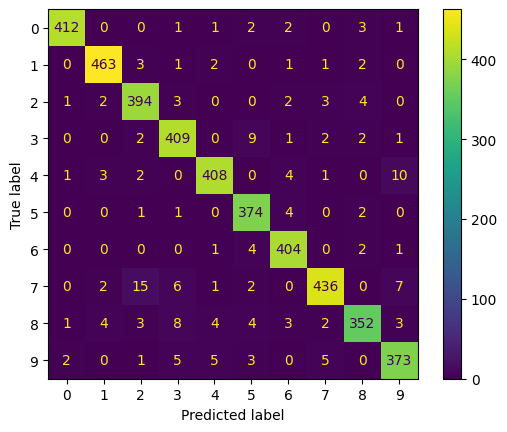

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       422
           1       0.98      0.98      0.98       473
           2       0.94      0.96      0.95       409
           3       0.94      0.96      0.95       426
           4       0.97      0.95      0.96       429
           5       0.94      0.98      0.96       382
           6       0.96      0.98      0.97       412
           7       0.97      0.93      0.95       469
           8       0.96      0.92      0.94       384
           9       0.94      0.95      0.94       394

    accuracy                           0.96      4200
   macro avg       0.96      0.96      0.96      4200
weighted avg       0.96      0.96      0.96      4200



In [52]:
from sklearn.neural_network import MLPClassifier
mlp=train_model(MLPClassifier(activation='relu',solver='adam'),{'learning_rate':['constant','adaptive'],})
report(mlp)

**Observation and Learning**

After applying PCA the number of components reduced to around 38 and accuracy of models increased which gave better results.
When comparing all models implemented above, support vector machine performed the best with accuracy score of 97.5% and decision tree performed the worst
with accuracy score of 85.5%.


*   Logistic regression was not suitable for this problem because in train data even small fluctuation can cause change in output and in logistic it generates a arbitrary line which does not provide accurate classification.
*   Decision tree was also not suitable for this problem because it will generate branches for small fluctutations in data which can cause overfitting.
*   KNN was suitable as it was able to classify based on clustered data which helped to avoid overfitting and therefore gave better accuracy
*   SVC was the most suitable model as it was able to provide the best classification line and in turn gave the best accuracy
*   MLP or multilayer perceptron was also suitable and can provide the best accuracy based on parameter tuning










**Conclusion**

In conclusion, building a handwritten digit recognition system using machine learning in Python involves selecting the appropriate dataset, preprocessing the data, choosing a suitable model, training the model, evaluating its performance, and developing a user interface for interactive use. These steps can be adapted and improved upon based on the specific requirements and constraints of the project.